In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Projects/nyc'

In [3]:
fares = pd.read_csv('data/trip_fare/trip_fare_11.csv')

fares.shape

(14388451, 11)

In [4]:
fares.tail(5)

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
14388446,981161555DEE587A5BC8C928CB2514AE,F371B99C7A715A375CD4B035C32732E5,CMT,2013-11-25 04:44:00,CRD,52.0,0.0,0.5,5.0,5.33,62.83
14388447,926291789F6E904E920508D584D93301,F7D2634D82BEFEFCEAFCD9D7A5C2846A,CMT,2013-11-25 08:25:59,CRD,6.0,0.0,0.5,2.0,0.00,8.50
14388448,B5A2A6106AC22D527F0DAF3E68E6E320,E1A4A83FA1BEA573C823984082C6BFED,CMT,2013-11-25 14:15:33,CRD,13.0,0.0,0.5,2.7,0.00,16.20
14388449,BE214ADD26750400C52407093C441701,D9573F449F1B17818F9485EB5E319E1F,CMT,2013-11-25 04:42:24,CRD,7.5,0.5,0.5,1.7,0.00,10.20
14388450,D854EEDDAD7974C3912027ED7AE8F606,8BF0E72CAB26DAC5F1BC7E052DC7CF63,CMT,2013-11-25 08:02:10,CRD,9.0,0.0,0.5,1.9,0.00,11.40


In [5]:
trips = pd.read_csv('data/trip_data/trip_data_11.csv')

trips.shape

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_6774/2752665082.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('data/trip_data/trip_data_11.csv')


(14388451, 14)

In [6]:
trips.tail(5)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
14388446,981161555DEE587A5BC8C928CB2514AE,F371B99C7A715A375CD4B035C32732E5,CMT,2,N,2013-11-25 04:44:00,2013-11-25 05:06:38,1,1357,18.5,-73.949677,40.776268,-73.783241,40.643860
14388447,926291789F6E904E920508D584D93301,F7D2634D82BEFEFCEAFCD9D7A5C2846A,CMT,1,N,2013-11-25 08:25:59,2013-11-25 08:31:31,1,332,0.8,-73.975464,40.755527,-73.975281,40.763924
14388448,B5A2A6106AC22D527F0DAF3E68E6E320,E1A4A83FA1BEA573C823984082C6BFED,CMT,1,N,2013-11-25 14:15:33,2013-11-25 14:32:22,1,1009,2.5,-74.003677,40.748505,-74.001793,40.721375
14388449,BE214ADD26750400C52407093C441701,D9573F449F1B17818F9485EB5E319E1F,CMT,1,N,2013-11-25 04:42:24,2013-11-25 04:46:52,1,268,2.1,-73.974876,40.782822,-73.986580,40.757378
14388450,D854EEDDAD7974C3912027ED7AE8F606,8BF0E72CAB26DAC5F1BC7E052DC7CF63,CMT,1,N,2013-11-25 08:02:10,2013-11-25 08:12:31,1,621,1.5,-73.956795,40.770844,-73.970047,40.752743


In [7]:
trips.dtypes

medallion               object
 hack_license           object
 vendor_id              object
 rate_code               int64
 store_and_fwd_flag     object
 pickup_datetime        object
 dropoff_datetime       object
 passenger_count         int64
 trip_time_in_secs       int64
 trip_distance         float64
 pickup_longitude      float64
 pickup_latitude       float64
 dropoff_longitude     float64
 dropoff_latitude      float64
dtype: object

In [8]:
# some columns have leading whitespace so lets remove it
trips.columns = [i.strip() for i in trips.columns]
trips.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [9]:
# some columns have leading whitespace so lets remove it
fares.columns = [i.strip() for i in fares.columns]
fares.columns

Index(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

In [10]:
trips = pd.merge(trips, fares, on=['medallion', 'hack_license', 'vendor_id', 'pickup_datetime'], how="left")
trips.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,CMT,1,N,2013-11-25 15:53:33,2013-11-25 16:00:51,1,437,0.6,...,40.752968,-73.985756,40.762684,CRD,6.0,1.0,0.5,1.0,0.0,8.5
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,CMT,1,N,2013-11-25 15:24:41,2013-11-25 15:30:18,1,336,0.5,...,40.764828,-73.982132,40.758888,CRD,5.5,0.0,0.5,3.0,0.0,9.0
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,CMT,1,N,2013-11-25 09:43:42,2013-11-25 10:02:57,1,1154,3.3,...,40.762508,-74.006851,40.719582,CRD,15.0,0.0,0.5,2.0,0.0,17.5
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,CMT,1,N,2013-11-25 06:49:58,2013-11-25 07:04:22,1,864,3.8,...,40.744480,-74.016060,40.717297,CRD,14.0,0.0,0.5,2.9,0.0,17.4
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,CMT,1,N,2013-11-25 10:02:12,2013-11-25 10:17:15,1,902,2.2,...,40.780964,-73.981628,40.777977,CRD,12.0,0.0,0.5,2.0,0.0,14.5


In [11]:
# dont need the fares dataset aymore
del(fares)

# Data dictionary
#### https://learn.microsoft.com/en-us/azure/open-datasets/dataset-taxi-yellow?tabs=azureml-opendatasets

In [12]:
trips.isna().sum()

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    7252607
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude         754
dropoff_latitude          754
payment_type                0
fare_amount                 0
surcharge                   0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
dtype: int64

# vendor_id

In [13]:
# 2 vendor_id
# VTS - VeriFone Transportation Systems
# CMT - Creative Mobile Technologies

trips.vendor_id.value_counts()

vendor_id
VTS    7251507
CMT    7136944
Name: count, dtype: int64

# rate_code

In [14]:
# https://www.nyc.gov/assets/tlc/downloads/pdf/taxi_information.pdf

# The final rate code in effect at the end of the trip. 
# 1= Standard rate; 
# 2= JFK; ?and manhattan?
# 3= Newark; 
# 4= Nassau or Westchester; 
# 5= Negotiated fare; ?ooc negotiated rate?
# 6= Group ride.

# 0,7,8,9,210? to be removed

trips.rate_code.value_counts().sort_index()

rate_code
0          1242
1      14074886
2        246583
3         21953
4          4470
5         39145
6           148
7             4
8             3
9             2
10            2
210          13
Name: count, dtype: int64

# store_and_fwd_flag

In [15]:
# This flag indicates whether the trip record was held in vehicle memory 
# before sending to the vendor, also known as “store and forward,” 
# because the vehicle did not have a connection to the server. 
# Y= store and forward trip; N= not a store and forward trip.

trips.store_and_fwd_flag.value_counts(dropna=False).sort_index()

store_and_fwd_flag
N      6999327
Y       136517
NaN    7252607
Name: count, dtype: int64

In [16]:
trips[['store_and_fwd_flag', 'payment_type']].value_counts(dropna=False).sort_index()

store_and_fwd_flag  payment_type
N                   CRD             3860975
                    CSH             3095075
                    DIS                9734
                    NOC               33543
Y                   CRD               76703
                    CSH               58297
                    DIS                 381
                    NOC                1136
NaN                 CRD             4045281
                    CSH             3154350
                    DIS                   2
                    NOC                  12
                    UNK               52962
Name: count, dtype: int64

# passenger_count

In [17]:
# number of passengers in the taxi
# remove where 0 or 7+
trips.passenger_count.value_counts(dropna=False).sort_index()

passenger_count
0           869
1      10085655
2       2027512
3        621673
4        301112
5        789652
6        561945
7            12
8             8
9            11
208           2
Name: count, dtype: int64

# fare_amount

In [18]:
# min charge for a cab is 2.50
trips.fare_amount.value_counts().sort_index()

fare_amount
2.50      60383
2.60          4
2.70          1
2.75          1
2.80          1
          ...  
468.16        1
477.76        1
477.83        1
488.86        2
500.00        7
Name: count, Length: 1598, dtype: int64

In [19]:
trips[trips['fare_amount']==2.5].head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
333,9406D2C34715E1DA10AD4D4DDADF4DA5,0602DFD837433635FE860BDE2F14BC3A,VTS,1,NaN,2013-11-04 20:16:00,2013-11-04 20:16:00,1,0,0.00,...,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.0,0.0,3.5
430,72BE95904DF002C8CA2077C571871244,6ECE3851E9D21ECF9786E198361E0366,VTS,1,NaN,2013-11-13 22:15:00,2013-11-13 22:15:00,1,0,0.07,...,0.000000,0.000000,0.000000,CSH,2.5,0.5,0.5,0.0,0.0,3.5
1144,B0D8DBE78A60485B9BFF22EE1A3AF081,C951257FE6744F083FBA037AC217F84D,VTS,1,NaN,2013-11-07 23:19:00,2013-11-07 23:19:00,1,0,0.05,...,40.721153,0.000000,0.000000,CSH,2.5,0.5,0.5,0.0,0.0,3.5
1165,670E230FA9EDFF1BE3D74F74737302E5,BF9867E68C9D74B51BDA13F97B8460FD,CMT,1,N,2013-11-25 00:07:10,2013-11-25 00:07:14,1,3,0.00,...,40.763844,-73.922836,40.763844,CRD,2.5,0.5,0.5,21.0,0.0,24.5
1255,9D5F86698EC694595E69AFC890A97176,960C250DD2D8D7C13A612E1DC71AF4C2,VTS,1,NaN,2013-11-07 23:26:00,2013-11-07 23:26:00,1,0,0.00,...,0.000000,0.000000,0.000000,CSH,2.5,0.5,0.5,0.0,0.0,3.5


In [20]:
trips.fare_amount.value_counts().head(20)

fare_amount
6.5     700756
6.0     694981
7.0     689765
5.5     669705
7.5     668865
8.0     640198
8.5     608184
5.0     605448
9.0     572024
9.5     534118
10.0    495058
4.5     493339
10.5    455346
11.0    417035
11.5    383268
12.0    352607
4.0     339512
12.5    323668
13.0    296428
13.5    272269
Name: count, dtype: int64

# trip_distance

In [21]:
trips.trip_distance.value_counts().sort_index().tail(20)

trip_distance
85.60     1
86.60     1
88.19     1
88.60     1
89.20     1
89.70     1
90.50     1
91.90     1
92.40     1
92.70     1
93.11     1
93.40     1
94.30     1
94.60     1
95.70     1
97.20     1
97.30     1
97.40     1
98.20     1
100.00    3
Name: count, dtype: int64

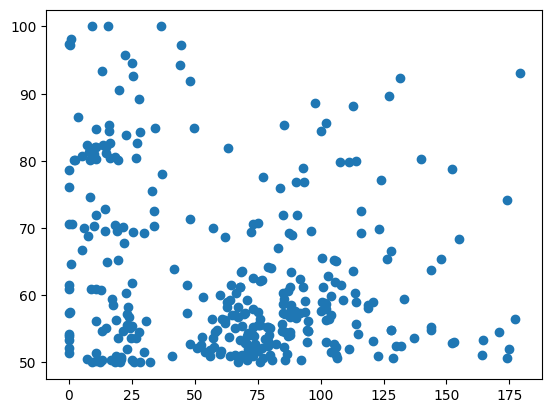

In [22]:
mins = trips.loc[trips['trip_distance']>= 50]['trip_time_in_secs']/60
distance = trips.loc[trips['trip_distance']>= 50]['trip_distance']

plt.scatter(mins, distance)

In [23]:

trips['trip_distance_metres'] = trips['trip_distance']*1600
trips['trip_mps'] = trips['trip_distance_metres'] / trips['trip_time_in_secs']
trips['trip_mph'] = trips['trip_mps']*2.236936

trips.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,trip_distance_metres,trip_mps,trip_mph
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,CMT,1,N,2013-11-25 15:53:33,2013-11-25 16:00:51,1,437,0.6,...,CRD,6.0,1.0,0.5,1.0,0.0,8.5,960.0,2.196796,4.914093
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,CMT,1,N,2013-11-25 15:24:41,2013-11-25 15:30:18,1,336,0.5,...,CRD,5.5,0.0,0.5,3.0,0.0,9.0,800.0,2.380952,5.326038
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,CMT,1,N,2013-11-25 09:43:42,2013-11-25 10:02:57,1,1154,3.3,...,CRD,15.0,0.0,0.5,2.0,0.0,17.5,5280.0,4.575390,10.234854
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,CMT,1,N,2013-11-25 06:49:58,2013-11-25 07:04:22,1,864,3.8,...,CRD,14.0,0.0,0.5,2.9,0.0,17.4,6080.0,7.037037,15.741401
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,CMT,1,N,2013-11-25 10:02:12,2013-11-25 10:17:15,1,902,2.2,...,CRD,12.0,0.0,0.5,2.0,0.0,14.5,3520.0,3.902439,8.729506


In [24]:
trips.loc[(trips['trip_mph']>55) & (trips['trip_time_in_secs']>0)].sort_values(by='trip_mph')

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,trip_distance_metres,trip_mps,trip_mph
7777384,3B0E8DC736D1E0D35C698D7B0BF9CBFA,C2795499408D0A69D691906B196659EA,CMT,2,N,2013-11-07 05:41:08,2013-11-07 05:58:03,1,1015,15.60,...,CRD,52.0,0.0,0.5,11.56,5.33,69.39,24960.0,24.591133,55.008791
7470326,EFC127C432AB79465586CD7B49FC243D,B4EDB7E48302093DA1F7843A75B43C24,CMT,1,N,2013-11-10 08:45:43,2013-11-10 09:05:02,1,1158,17.80,...,CRD,47.5,0.0,0.5,9.60,0.00,57.60,28480.0,24.594128,55.015490
13407503,94DD5A5691E5D26DCE34209B23220CF0,A71F18DD8FC5F94FA555C28E8FAF7B2A,VTS,2,NaN,2013-11-28 07:17:00,2013-11-28 07:34:00,1,1020,15.68,...,CSH,52.0,0.0,0.5,0.00,5.33,57.83,25088.0,24.596078,55.019853
11245454,7344B546AF944B992AC719059E8F4DF6,E8694B6B9061A4278B0ED898CFB4BCA6,CMT,2,N,2013-11-20 23:32:51,2013-11-20 23:54:19,1,1288,19.80,...,CRD,52.0,0.0,0.5,11.55,5.33,69.38,31680.0,24.596273,55.020289
5205499,DBAEF4F654276E926495144A7483ED02,0E8B91EC0F8B0F3BBCA2838B405D8B46,VTS,2,NaN,2013-11-21 19:16:00,2013-11-21 19:20:00,2,240,3.69,...,CRD,52.0,0.0,0.5,11.47,5.33,69.30,5904.0,24.600000,55.028626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11880324,E79712363B74EB213BDE6F8FB1163FB4,8F4DCB0C4FEDAED4AFED5A9000B2DBC5,CMT,1,N,2013-11-18 10:32:07,2013-11-18 10:32:09,1,1,18.80,...,CSH,2.5,0.0,0.5,0.00,0.00,3.00,30080.0,30080.000000,67287.034880
6075884,B141D5CE21EE082E4D089FEA73E62C1B,073EB4A0271C658DDCB3501A0368BCD3,CMT,1,N,2013-11-27 12:59:15,2013-11-27 12:59:16,1,1,19.60,...,CSH,2.5,0.0,0.5,0.00,0.00,3.00,31360.0,31360.000000,70150.312960
8843082,32A5A17FE62184FADFBDAC0C12A532F9,5C8B292A042D1FC904297C5D6EB8E3F9,CMT,2,N,2013-11-05 07:03:20,2013-11-05 07:03:22,1,1,20.90,...,DIS,52.0,0.0,0.5,0.00,0.00,52.50,33440.0,33440.000000,74803.139840
12038906,70166F37A5CC66D9A35366764ACC40DC,F0FD8F038C690159E50003B13437C22C,CMT,1,N,2013-11-19 00:41:19,2013-11-19 00:41:21,1,1,26.20,...,CSH,30.0,0.0,0.5,0.00,0.00,30.50,41920.0,41920.000000,93772.357120


# payment_type

In [26]:
trips.payment_type.value_counts()

payment_type
CRD    7982959
CSH    6307722
UNK      52962
NOC      34691
DIS      10117
Name: count, dtype: int64

In [ ]:
# we will drop any payment type that is not cash or card

# Dropping rows with invalid values

In [27]:
print("Rows with passenger_count=0:", len(trips[trips['passenger_count']==0]))
print("Rows with passenger_count>6:", len(trips[trips['passenger_count']>6]))
print("Rows with trip_time_in_secs<=30:", len(trips[trips['trip_time_in_secs']<=30]))
print("Rows with trip_distance=0:", len(trips[trips['trip_distance']==0.0]))
print("Rows with rate_code in [0,7,8,9,210]:", len(trips[trips['rate_code'].isin([0,7,8,9,210])]))
print("Rows with trip_mph>55:", len(trips.loc[(trips['trip_mph']>55) & (trips['trip_time_in_secs']>0)]))
print("Rows with payment_type in ['UNK', 'NOC', 'DIS']:", len(trips[trips['payment_type'].isin(['UNK', 'NOC', 'DIS'])]))



Rows with passenger_count=0: 869
Rows with passenger_count>6: 33
Rows with trip_time_in_secs<=30: 70155
Rows with trip_distance=0: 77304
Rows with rate_code in [0,7,8,9,210]: 1264
Rows with trip_mph>55: 9042
Rows with payment_type in ['UNK', 'NOC', 'DIS']: 97770


In [28]:
# set bounds for longitude and latitude
# manually picked points from google maps as 4 corners of square surrounding new york

# top left 40.93, -74.3
# bottom left : 40.47, -74.3
# top right 40.93, -73.69
# bottom right 40.47, -73.69

# longitude:  -74.3 < x < -73.69
# latitude: 40.47 < x < 40.93

# count rows with undesirable lat and longs for pickup
print("Rows with pickup_longitude < -74.3 :", len(trips[trips['pickup_longitude'] < -74.3]))
print("Rows with pickup_longitude > -73.69 :", len(trips[trips['pickup_longitude'] > -73.69]))
print("Rows with pickup_longitude = 0 :", len(trips[trips['pickup_longitude']==0.0]))
print()
print("Rows with pickup_latitude < 40.47 :", len(trips[trips['pickup_latitude'] < 40.47]))
print("Rows with pickup_latitude > 40.93 :", len(trips[trips['pickup_latitude'] > 40.93]))
print("Rows with pickup_latitude = 0 :", len(trips[trips['pickup_latitude'] == 0.0]))
print()

# count rows with undesirable lat and longs for dropoff
print("Rows with dropoff_longitude < -74.3 :", len(trips[trips['dropoff_longitude'] < -74.3]))
print("Rows with dropoff_longitude > -73.69 :", len(trips[trips['dropoff_longitude'] > -73.69]))
print("Rows with dropoff_longitude = 0 :", len(trips[trips['dropoff_longitude']==0.0]))
print()
print("Rows with dropoff_latitude < 40.47 :", len(trips[trips['dropoff_latitude'] < 40.47]))
print("Rows with dropoff_latitude > 40.93 :", len(trips[trips['dropoff_latitude'] > 40.93]))
print("Rows with dropoff_latitude = 0 :", len(trips[trips['dropoff_latitude'] == 0.0]))

Rows with pickup_longitude < -74.3 : 654
Rows with pickup_longitude > -73.69 : 274970
Rows with pickup_longitude = 0 : 273786

Rows with pickup_latitude < 40.47 : 274223
Rows with pickup_latitude > 40.93 : 1123
Rows with pickup_latitude = 0 : 273786

Rows with dropoff_longitude < -74.3 : 1053
Rows with dropoff_longitude > -73.69 : 286637
Rows with dropoff_longitude = 0 : 282855

Rows with dropoff_latitude < 40.47 : 283363
Rows with dropoff_latitude > 40.93 : 3190
Rows with dropoff_latitude = 0 : 282853


In [30]:
# invalid values to exlude
passenger_count_indices_to_drop = trips[trips['passenger_count']==0].index.tolist()
high_passenger_count_indices_to_drop = trips[trips['passenger_count']>6].index.tolist()
trip_time_in_secs_indices_to_drop = trips[trips['trip_time_in_secs']<=30].index.tolist()
trip_distance_indices_to_drop = trips[trips['trip_distance']==0.0].index.tolist()
rate_code_indices_to_drop = trips[trips['rate_code'].isin([0,7,8,9,210])].index.tolist()
trip_speed_indices_to_drop = trips.loc[(trips['trip_mph']>55) & (trips['trip_time_in_secs']>0)].index.tolist()
payment_type_indices_to_drop = trips[trips['payment_type'].isin(['UNK', 'NOC', 'DIS'])].index.tolist()

# geo locations for pickups to exclude, any trip that was a pickup outside a square boundary of the city
pickup_long_indices_to_drop_1 = trips[trips['pickup_longitude'] < -74.3].index.tolist()
pickup_long_indices_to_drop_2 = trips[trips['pickup_longitude'] > -73.69].index.tolist()
pickup_lat_indices_to_drop_1 = trips[trips['pickup_latitude'] < 40.47].index.tolist()
pickup_lat_indices_to_drop_2 = trips[trips['pickup_latitude'] > 40.93].index.tolist()

# geo locations for dropoffs to exclude, any trip that was a pickup outside a square boundary of the city
dropoff_long_indices_to_drop_1 = trips[trips['dropoff_longitude'] < -74.3].index.tolist()
dropoff_long_indices_to_drop_2 = trips[trips['dropoff_longitude'] > -73.69].index.tolist()
dropoff_lat_indices_to_drop_1 = trips[trips['dropoff_latitude'] < 40.47].index.tolist()
dropoff_lat_indices_to_drop_2 = trips[trips['dropoff_latitude'] > 40.93].index.tolist()

indices_to_drop = list(set(passenger_count_indices_to_drop + 
                           high_passenger_count_indices_to_drop +
                           trip_time_in_secs_indices_to_drop + 
                           trip_distance_indices_to_drop + 
                           rate_code_indices_to_drop +
                           trip_speed_indices_to_drop +
                           payment_type_indices_to_drop +
                          
                           pickup_long_indices_to_drop_1 +
                           pickup_long_indices_to_drop_2 +
                          
                           pickup_lat_indices_to_drop_1 +
                           pickup_lat_indices_to_drop_2 +

                           dropoff_long_indices_to_drop_1 +
                           dropoff_long_indices_to_drop_2 +

                           dropoff_lat_indices_to_drop_1 +
                           dropoff_lat_indices_to_drop_2
                          ))

print(f"Distinct rows to be dropped: {len(indices_to_drop)}")

Distinct rows to be dropped: 447930


In [31]:
df = trips[~trips.index.isin(indices_to_drop)]

del(trips)

df.shape

(13940521, 24)

In [32]:
# clean date and time
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df[['pickup_datetime', 'dropoff_datetime']].dtypes

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object

In [33]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_month'] = df['pickup_datetime'].dt.day
df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()
df['pickup_month'] = df['pickup_datetime'].dt.month

df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,tolls_amount,total_amount,trip_distance_metres,trip_mps,trip_mph,pickup_hour,pickup_day_of_month,pickup_day_of_week,pickup_month,dropoff_hour
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,CMT,1,N,2013-11-25 15:53:33,2013-11-25 16:00:51,1,437,0.6,...,0.0,8.5,960.0,2.196796,4.914093,15,25,Monday,11,16
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,CMT,1,N,2013-11-25 15:24:41,2013-11-25 15:30:18,1,336,0.5,...,0.0,9.0,800.0,2.380952,5.326038,15,25,Monday,11,15
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,CMT,1,N,2013-11-25 09:43:42,2013-11-25 10:02:57,1,1154,3.3,...,0.0,17.5,5280.0,4.575390,10.234854,9,25,Monday,11,10
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,CMT,1,N,2013-11-25 06:49:58,2013-11-25 07:04:22,1,864,3.8,...,0.0,17.4,6080.0,7.037037,15.741401,6,25,Monday,11,7
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,CMT,1,N,2013-11-25 10:02:12,2013-11-25 10:17:15,1,902,2.2,...,0.0,14.5,3520.0,3.902439,8.729506,10,25,Monday,11,10


In [34]:
df['pickup_month'].value_counts()

pickup_month
11    13940521
Name: count, dtype: int64

In [35]:
df.to_csv("cleaned_trip_data.csv")